In [1]:
import matplotlib.pyplot as plt
import pandas as pd

fs = 10
plt.rcParams["font.size"] = fs
plt.rcParams["axes.titlesize"] = plt.rcParams["font.size"]
plt.rcParams["lines.linewidth"] = 0.5

def cm2inch(x,y): return [x/2.54, y/2.54]

In [2]:
D = pd.read_csv("../result/test4.csv")

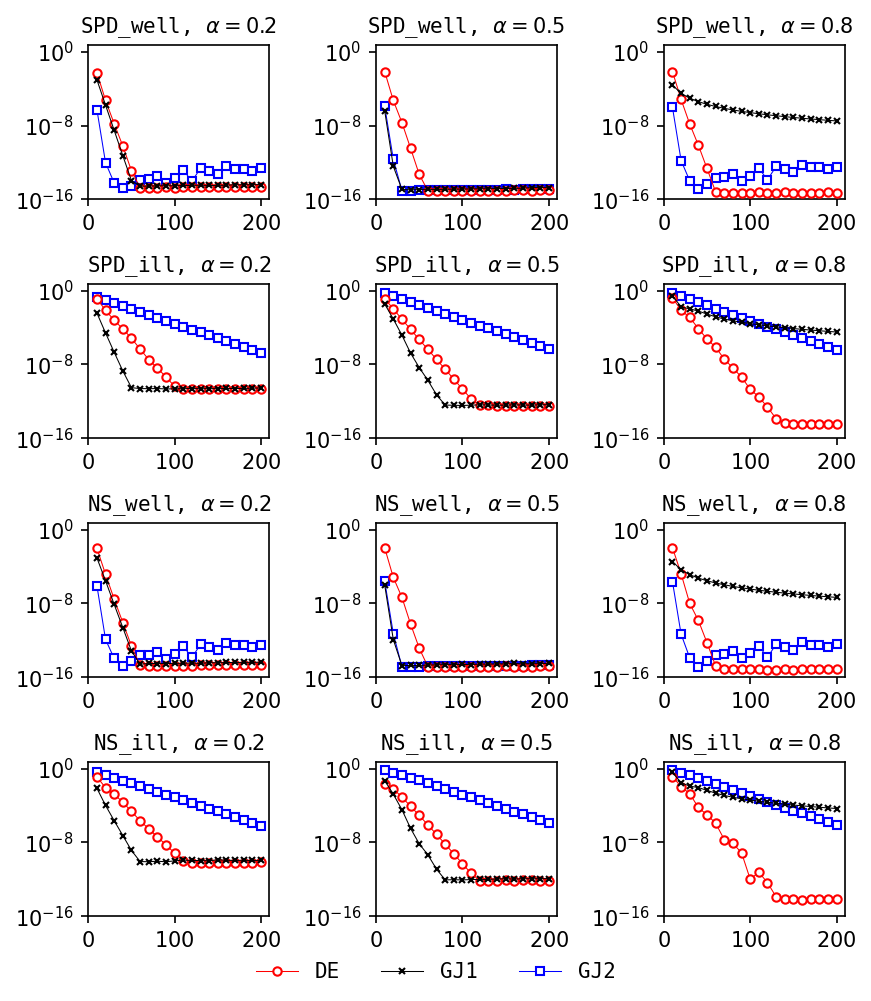

In [3]:
fig, ax = plt.subplots(4, 3, figsize=cm2inch(15, 5.5*3 + 0.5), dpi=150)

for i, matname in enumerate(["SPD_well", "SPD_ill", "NS_well", "NS_ill"]):
    for j, αx10 in enumerate([2,5,8]):
        m = D["m"]
        y1 = D["%s_%s_de" % (matname, αx10)]
        y2 = D["%s_%s_gj1" % (matname, αx10)]
        y3 = D["%s_%s_gj2" % (matname, αx10)]
        
        p1,  = ax[i][j].plot(m, y1, label="DE", zorder=3,
                             ms=4, marker="o", c="r", markerfacecolor="w", markeredgecolor="r")
        p2,  = ax[i][j].plot(m, y2, label="GJ1", c="k", zorder=5,
                             marker="x", ms=3,)
        p3,  = ax[i][j].plot(m, y3, label="GJ2",
                             marker="s", c="b", markerfacecolor="w", markeredgecolor="b", ms=4)

        ax[i][j].set_yscale("log")
        ax[i][j].set_xticks([0,100,200])
        ax[i][j].set_xticklabels(["$0$","$100$","$200$"])
        ax[i][j].set_ylim(1e-16,5e0)
        ax[i][j].set_yticks([1e-16, 1e-8, 1e0])
        ax[i][j].set_yticklabels(["$10^{-16}$","$10^{-8}$", "$10^0$"])
        ax[i][j].set_title("%s, $\\alpha = 0.%d$" % (matname, αx10), family="DejaVu Sans Mono")
        

fig.tight_layout()
fig.legend((p1, p2, p3), ["DE", "GJ1", "GJ2"], loc=8, ncol=3,
           prop={"family":"DejaVu Sans Mono"}, frameon=False)

plt.subplots_adjust(bottom=0.08)
plt.savefig("fig-test4.pdf")
plt.show()

5.126